<h1>Generate Data Set</h1>
<p1>First step, because I need generate 100 points from two Mixture Gaussian Distributions and each dustribution has 5 Gaussian Distributions so I generate random 5 numbers with meaning the numbers of points of the Gaussian component to be generated from it for each Mixture Gaussian Distribution.<p1>

In [13]:
import random
import numpy as np

def random_with_sum(n, total):
    return np.random.multinomial(total, np.ones(n)/n, size=1)[0]

z1 = random_with_sum(5, 100)
z2 = random_with_sum(5, 100)

print('z1 =', z1)
print('z2 =', z2)

z1 = [20 20 21 23 16]
z2 = [20 15 25 18 22]


Next step, each Distribution of the Mixture Gaussian Distribution has different mean (range [-1, 0] and [0, 1]) so I generate random 5 numbers in range of each Mixture Gaussian Distribution.

In [14]:
mean1 = []
mean2 = []

for i in range(5):
    mean1.append(round(random.uniform(-1, 0), 1))
    mean2.append(round(random.uniform(0, 1), 1))
    
print('mean1 =', mean1)
print('mean2 =', mean2)

mean1 = [-0.2, -0.7, -0.8, -0.3, -0.6]
mean2 = [0.7, 0.3, 0.1, 0.4, 0.2]


I have number of points, mean, variance of each Gaussian Distribution, I start create data set with numpy.

In [15]:
x1 = np.empty((0, 0))
x2 = np.empty((0, 0))
y1 = np.empty((0, 0))
y2 = np.empty((0, 0))

for i in range(5):
    x1 = np.append(x1, np.random.normal(mean1[i], 1, z1[i]))
    y1 = np.append(y1, np.random.normal(mean1[i], 1, z1[i]))
    x2 = np.append(x2, np.random.normal(mean2[i], 1, z2[i]))
    y2 = np.append(y2, np.random.normal(mean2[i], 1, z2[i]))

<h1>Plot Data</h1>
I have 200 data points, I use matplotlib to plot it with Two-dimensional space.

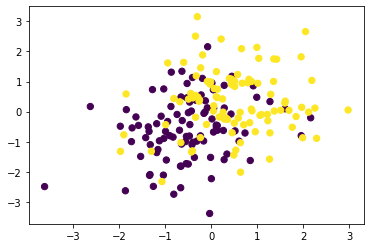

In [16]:
import matplotlib.pyplot as plt

X = []
y = []

for i in range(len(x1)):
    X.append([x1[i], y1[i]])
    y.append(1)
    
for i in range(len(x2)):
    X.append([x2[i], y2[i]])
    y.append(2)
    
X = np.asarray(X)
labels = np.asarray(y)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

Finally, because my data set is created by Gaussian Distributions so I use Gaussian Mixture Models to find boundaries of them.

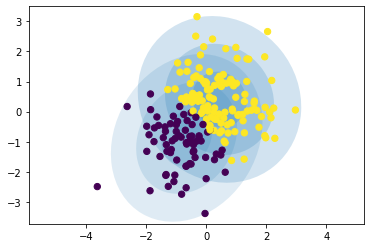

In [17]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

gmm = GMM(n_components=2)
plot_gmm(gmm, X)